In [176]:

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content'): # path of the input folder
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/content/Tuesday-WorkingHours.pcap_ISCX.csv
/content/Random Forest Classification.png
/content/Monday-WorkingHours.pcap_ISCX.csv
/content/final_data1.csv
/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/content/Wednesday-workingHours.pcap_ISCX.csv
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/gce
/content/.config/configurations/config_default
/content/.config/logs/2023.12.04/14.20.49.627769.log
/content/.config/logs/2023.12.04/14.23.49.652015.log
/content/.config/logs/2023.12.04/14.23.59.638040.log
/content/.config/logs/2023.12.04/14.26.59.279282.log
/content/.config/logs/2023.12.04/14.27.00.107426.log
/content/.config/logs/2023.12.04/14.26.48.840108.log
/content/drive/MyDrive/Getting started.pdf
/content/driv

In [177]:
import numpy as np
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
low_memory=False
df1 = pd.read_csv("/content/final_data1.csv")
# df2=pd.read_csv("/content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
# df3=pd.read_csv("/content/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df2=pd.read_csv("/content/Monday-WorkingHours.pcap_ISCX.csv")
df3=pd.read_csv("/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df4=pd.read_csv("/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df5=pd.read_csv("/content/Tuesday-WorkingHours.pcap_ISCX.csv")
df6=pd.read_csv("/content/Wednesday-workingHours.pcap_ISCX.csv")

In [179]:
nRowsRead = None
# df = pd.concat([df1])
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
# df = pd.concat([df,df7])
# del df7
# df = pd.concat([df,df8])
# del df8
df.shape

(2319202, 79)

In [180]:
df[' Label'].value_counts()

BENIGN                        2048342
DoS Hulk                       231073
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
DDoS                              171
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [181]:
df.duplicated().sum()

219431

In [182]:
df.shape

(2319202, 79)

In [83]:
df =  df.drop_duplicates(keep="first")

In [183]:
df.duplicated().sum()

219431

In [184]:
df.shape

(2319202, 79)

In [185]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s                    1339
 Total Fwd Packets                 1
 Total Backward Packets            1
 Flow Duration                     1
 Destination Port                  0
 Average Packet Size               0
 Fwd Avg Bulk Rate                 0
 Fwd Avg Packets/Bulk              0
Fwd Avg Bytes/Bulk                 0
 Fwd Header Length.1               0
 Avg Bwd Segment Size              0
 Avg Fwd Segment Size              0
 ECE Flag Count                    0
 Down/Up Ratio                     0
 Bwd Avg Packets/Bulk              0
 CWE Flag Count                    0
 URG Flag Count                    0
 ACK Flag Count                    0
 PSH Flag Count                    0
 RST Flag Count                    0
 SYN Flag Count                    0
 Bwd Avg Bytes/Bulk                0
Subflow Fwd Packets                0
Bwd Avg Bulk Rate                  0
 Packet Length Variance            0
 Idle Min                          0
 Idle Max                          0
 

In [186]:
df.dropna(inplace=True)

In [187]:
df.shape

(2317861, 79)

In [188]:
df.isnull().sum().sort_values(ascending = False)

 Destination Port               0
 ECE Flag Count                 0
 Fwd Avg Packets/Bulk           0
Fwd Avg Bytes/Bulk              0
 Fwd Header Length.1            0
 Avg Bwd Segment Size           0
 Avg Fwd Segment Size           0
 Average Packet Size            0
 Down/Up Ratio                  0
 CWE Flag Count                 0
 Bwd Avg Bytes/Bulk             0
 URG Flag Count                 0
 ACK Flag Count                 0
 PSH Flag Count                 0
 RST Flag Count                 0
 SYN Flag Count                 0
FIN Flag Count                  0
 Packet Length Variance         0
 Fwd Avg Bulk Rate              0
 Bwd Avg Packets/Bulk           0
 Packet Length Mean             0
Active Mean                     0
 Idle Min                       0
 Idle Max                       0
 Idle Std                       0
Idle Mean                       0
 Active Min                     0
 Active Max                     0
 Active Std                     0
 min_seg_size_

In [189]:
df.shape

(2317861, 79)

In [190]:
df=df.groupby(' Label').filter(lambda x:len(x)>10)
df[' Label'].value_counts()

BENIGN                        2047952
DoS Hulk                       230124
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
DDoS                              169
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [191]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [192]:
df.shape

(2317861, 79)

In [193]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns[i]
              col_corr.add(colname)
    return col_corr

In [194]:
corr_features = correlation(df, 0.85)
corr_features

<ipython-input-193-5f14b0352d5a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [195]:
x = df.drop([' Label'],axis=1)
y = df[' Label']

In [196]:
x.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740688.0,32.0,16.0,6448.0,1152,403,0,201.5,204.724197,72,72,72.0,0.0,67.411331,0.425756,2.398738e+06,5.798698e+06,16400000,3,113000000,3.636796e+06,6.848761e+06,16400000,3,113000000,7516023.0,8323385.0,16400000,3,1,0,0,0,1024,512,0.283837,0.141919,0,403,163.326538,178.931717,32016.558594,0,1,0,0,1,0,0,0,0,166.729172,201.5,72.0,1024,0,0,0,0,0,0,32,6448,16,1152,377,2079,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560.0,32.0,16.0,6448.0,5056,403,0,201.5,204.724197,316,316,316.0,0.0,102.039589,0.425756,2.398735e+06,5.798710e+06,16400000,2,113000000,3.636792e+06,6.848777e+06,16400000,2,113000000,7516016.0,8323376.0,16400000,4,1,0,0,0,1024,512,0.283837,0.141919,0,403,243.000000,174.716919,30526.000000,0,1,0,0,1,0,0,0,0,248.062500,201.5,316.0,1024,0,0,0,0,0,0,32,6448,16,5056,955,2079,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757376.0,545.0,0.0,0.0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.000000,4.790898,2.091128e+05,1.395543e+06,20800000,0,114000000,2.091128e+05,1.395543e+06,20800000,0,0,0.0,0.0,0,0,0,0,0,0,0,0,4.790898,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0,0,0,0,0,0,0,545,0,0,0,-1,-1,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126.0,22.0,0.0,616.0,0,28,28,28.0,0.000000,0,0,0.0,0.0,6152.248047,219.723145,4.767905e+03,2.183302e+04,100055,1,100126,4.767905e+03,2.183302e+04,100055,1,0,0.0,0.0,0,0,0,0,0,0,704,0,219.723145,0.000000,28,28,28.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,29.272728,28.0,0.0,704,0,0,0,0,0,0,22,616,0,0,-1,-1,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760.0,4.0,0.0,0.0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.000000,73.046021,1.825333e+04,3.046984e+04,53431,108,54760,1.825333e+04,3.046984e+04,53431,108,0,0.0,0.0,0,0,0,0,0,0,0,0,73.046021,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0,0,0,0,0,0,0,4,0,0,0,-1,-1,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


In [161]:
y.head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name:  Label, dtype: object

In [197]:
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)
# Xn.value_counts()

In [198]:
Xn.head()
Xn.shape

(154, 78)

In [200]:
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

In [201]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

In [202]:
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

True
False


In [203]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with 'mean' strategy to replace NaN values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to X_train and transform X_train and X_test with it
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Apply StandardScaler to X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC

start = time.time()
Random_Forest = RFC(max_depth=40)
Random_Forest.fit(X_train, Y_train)
print("Time taken to train model: ", time.time()-start," seconds")

Time taken to train model:  0.3979811668395996  seconds


In [205]:
from sklearn import metrics
Predict_X =  Random_Forest.predict(X_train)
scores = cross_val_score(Random_Forest, X_train, Y_train, cv=7)
accuracy = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_train, Predict_X)
classification = metrics.classification_report(Y_train, Predict_X)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=7.
  warnings.warn(


In [206]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification)


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.8136904761904761

Model Accuracy:
 1.0

Confusion matrix:
 [[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9]]

Classification report:
                             precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00         9
                       Bot       1.00      1.

In [207]:
def plot_confusion_matrix(cm,title,cmap=None,target=None,normalize=False):

    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target is not None:
        ticks = np.arange(len(target))
        plt.xticks(ticks, target, rotation=45)
        plt.yticks(ticks, target)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)

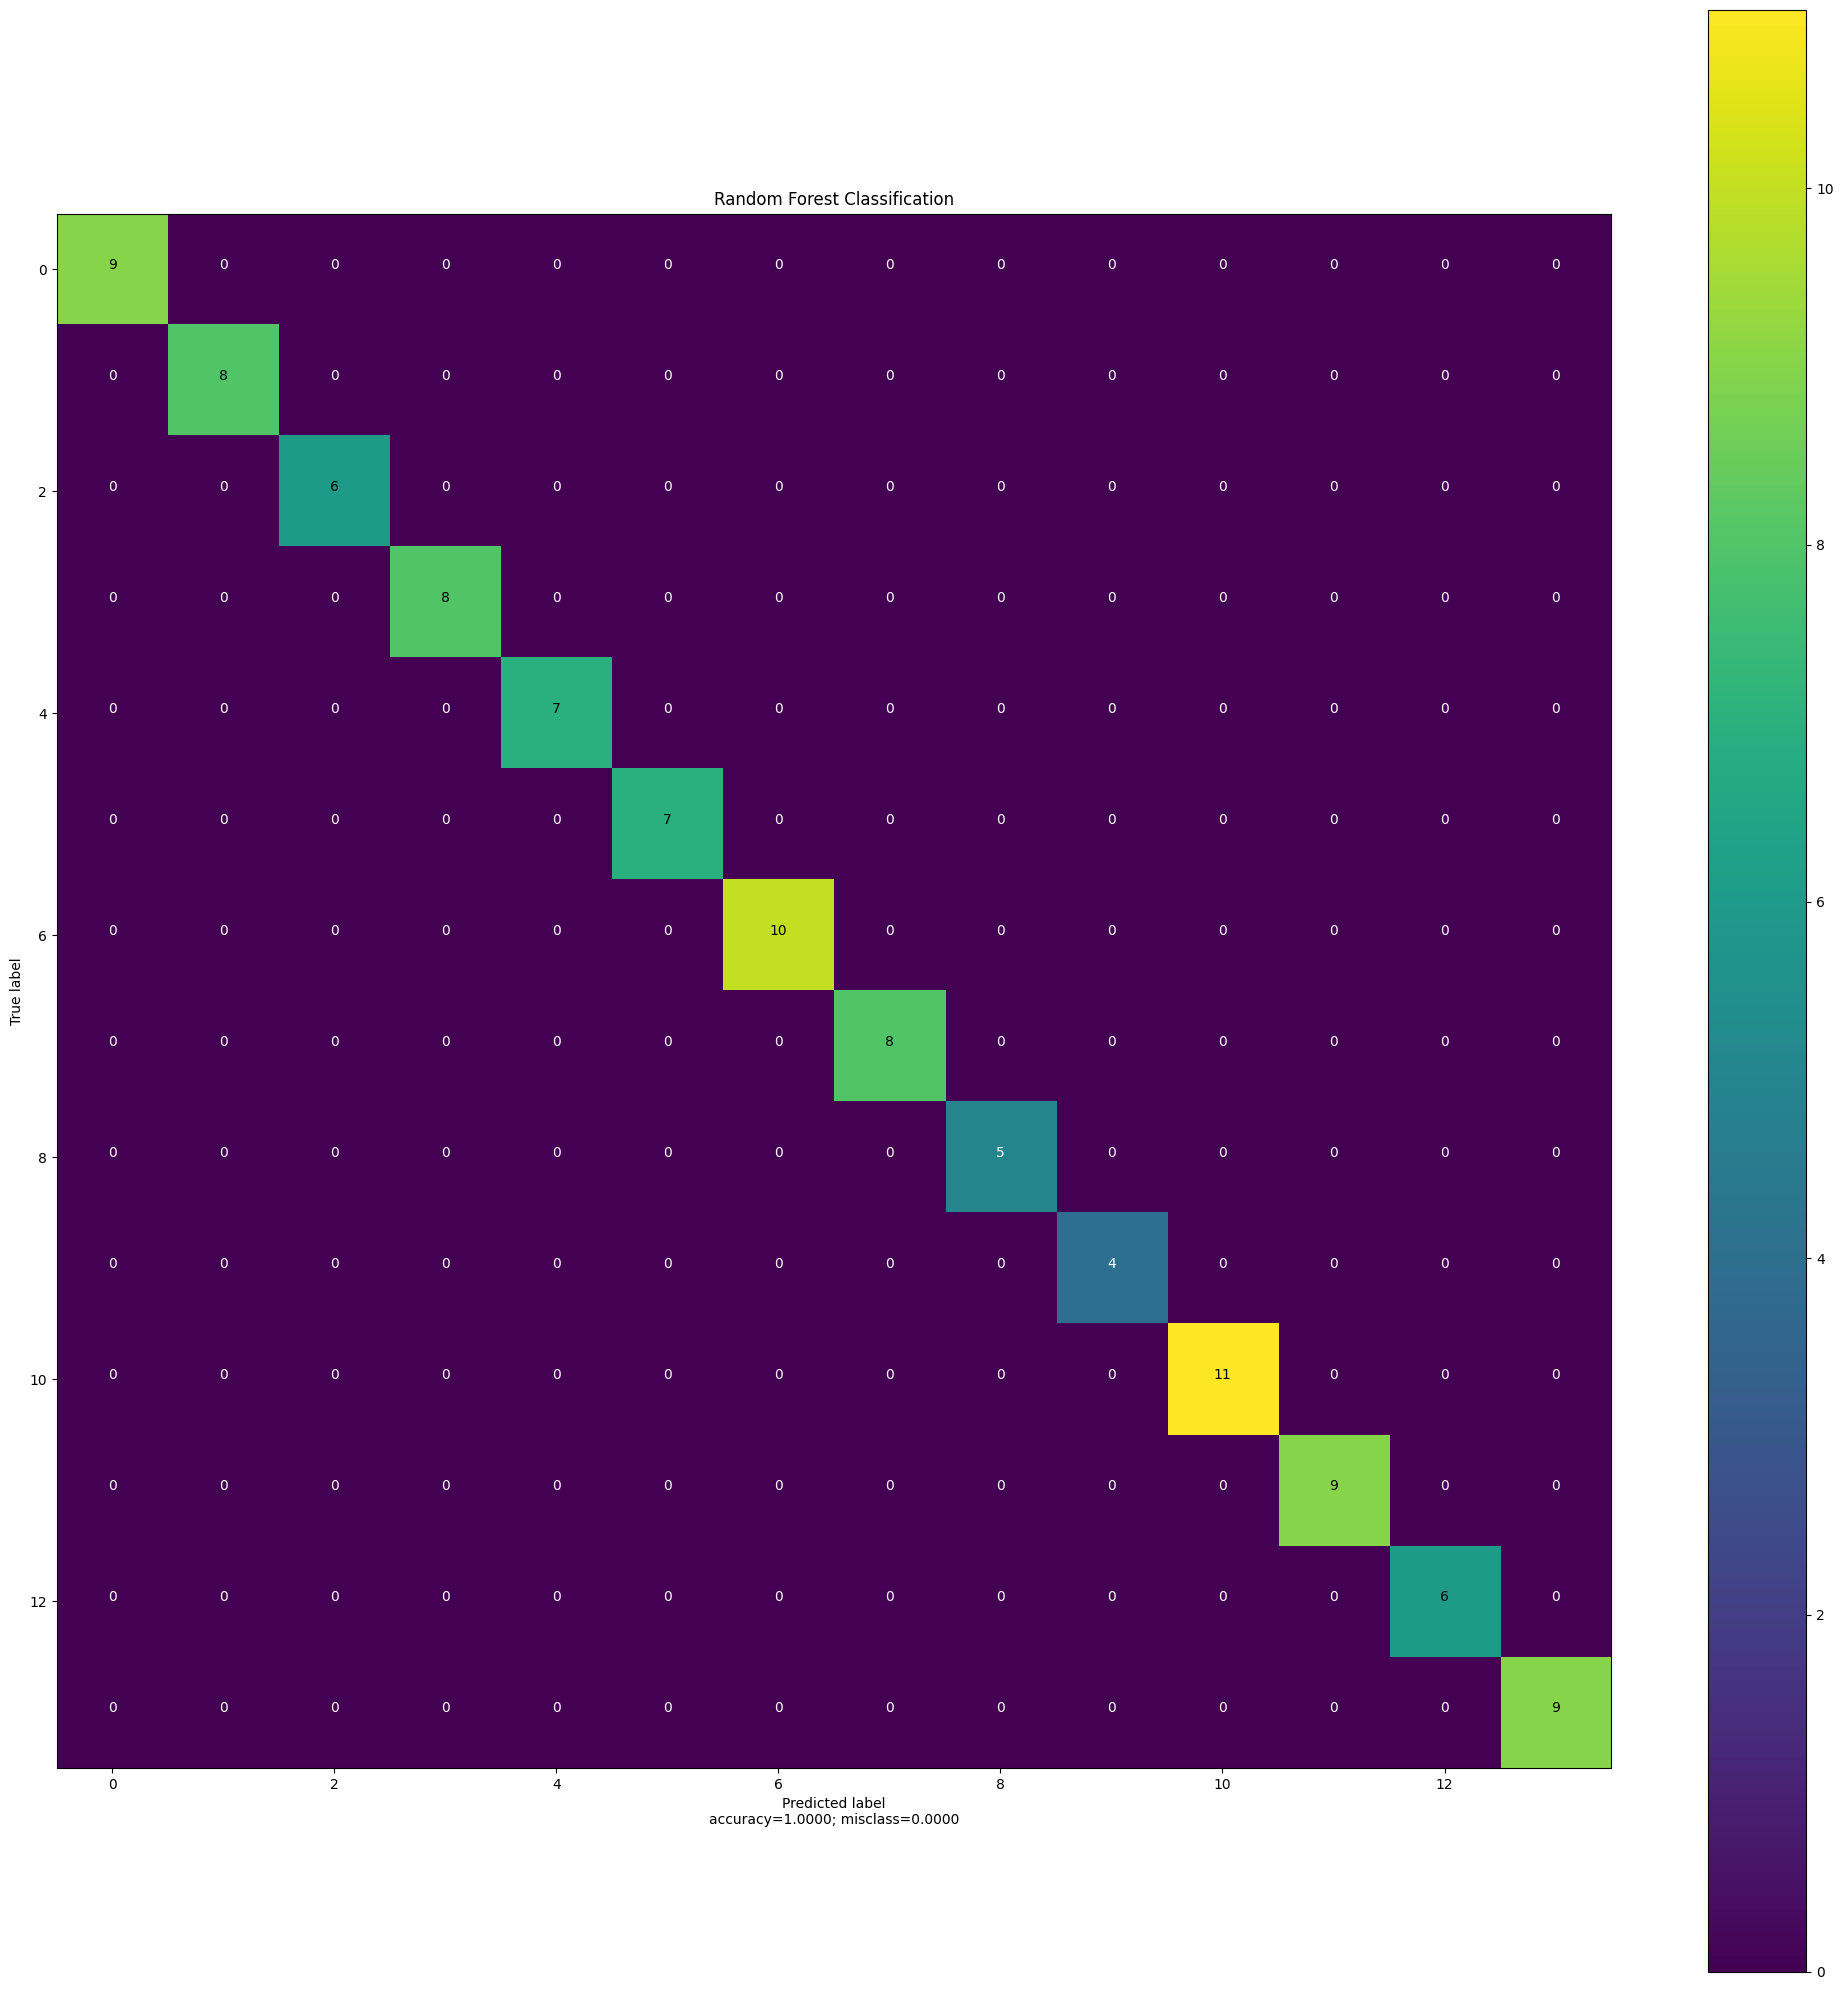

<Figure size 640x480 with 0 Axes>

In [208]:
plot_confusion_matrix(cm=confusion_matrix ,title= 'Random Forest Classification')

In [209]:
Predict_X =  Random_Forest.predict(X_test)
scores = cross_val_score(Random_Forest, X_test, Y_test, cv=7)
accuracy = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_test, Predict_X)
classification = metrics.classification_report(Y_test, Predict_X)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


In [210]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification)


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.6564625850340137

Model Accuracy:
 0.9148936170212766

Confusion matrix:
 [[1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1]]

Classification report:
                             precision    recall  f1-score   support

                    BENIGN       1.00      0.50      0.67         2
                       Bot       1.00      1.00      1.00         3
                      DDoS       1.00      1.00      1.00         5
             DoS GoldenEye       0.75      1.00      0.86         3
                  DoS Hulk       1.00      1.00      1.00         4
          D

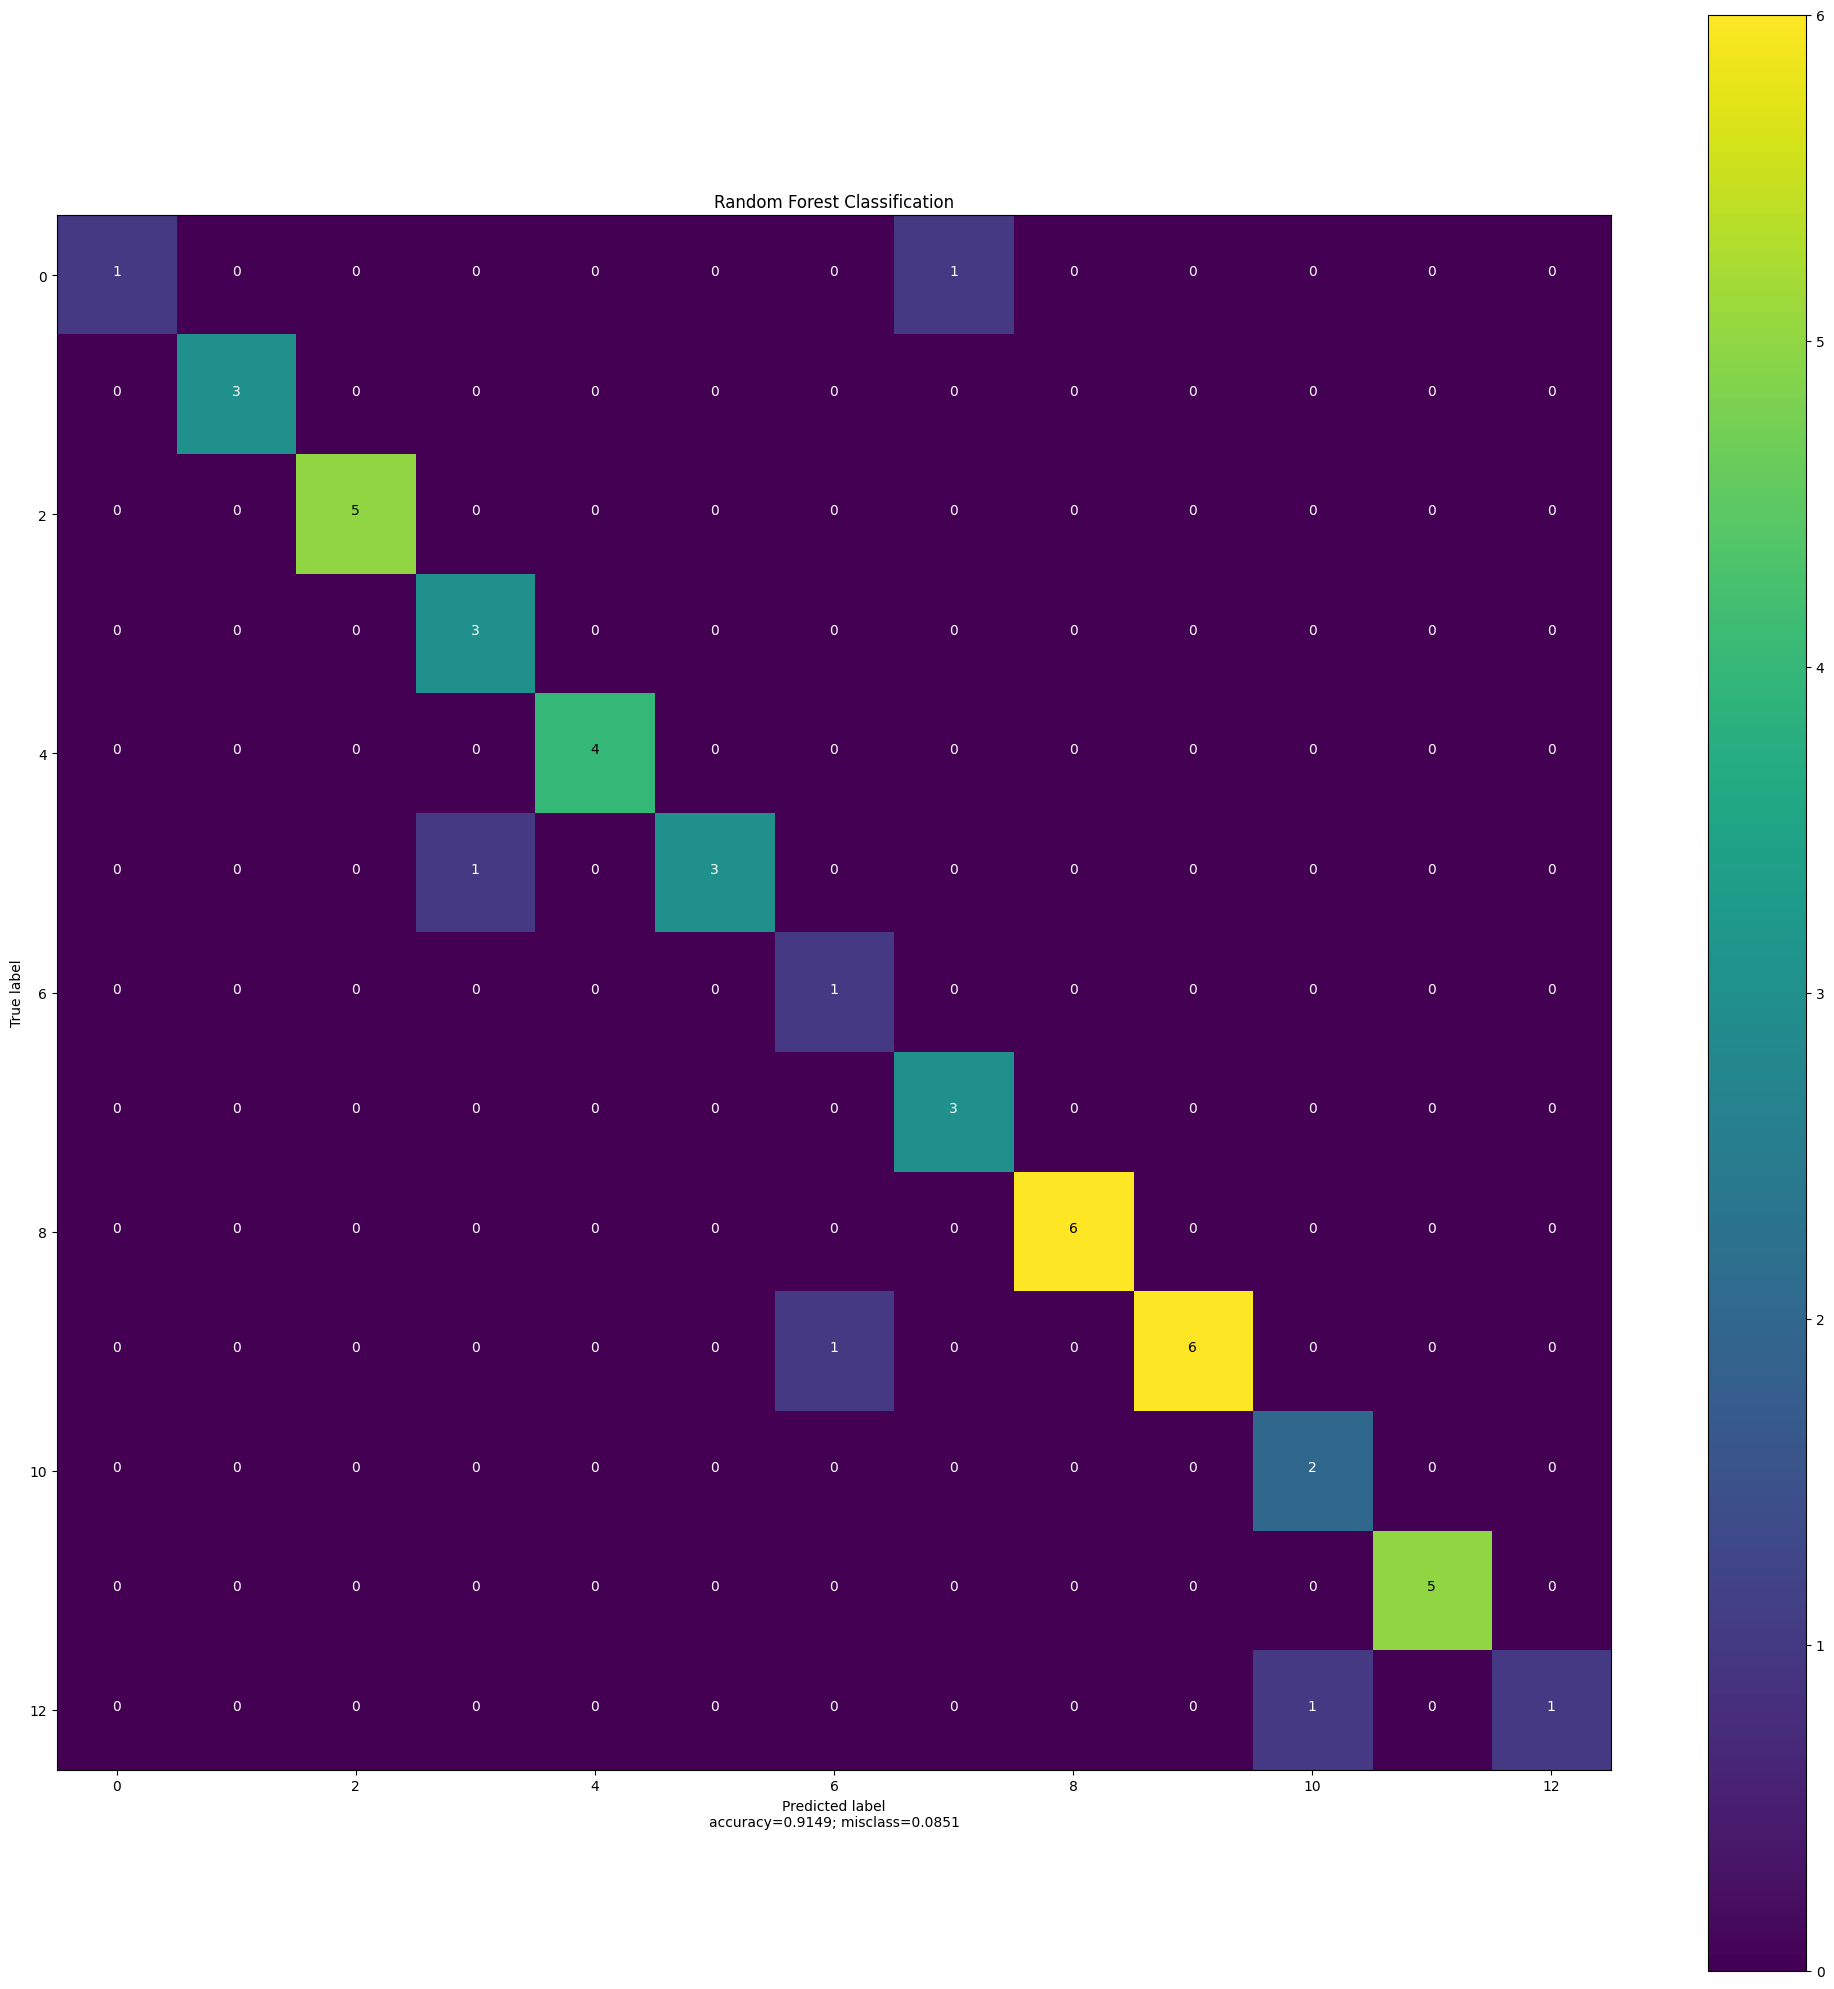

<Figure size 640x480 with 0 Axes>

In [211]:
plot_confusion_matrix(cm=confusion_matrix ,title= 'Random Forest Classification')